In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares
import scipy.signal
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from lightkurve import search_lightcurve
import courseworkb
import importlib

# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)


<module 'courseworkb' from '/home/omcevoy/AstroCourseworkB/courseworkb.py'>

In [147]:
target =  'Kepler-17'
kepler_dataframe, stellar_data = courseworkb.fetch_kepler_data_and_stellar_info(target)


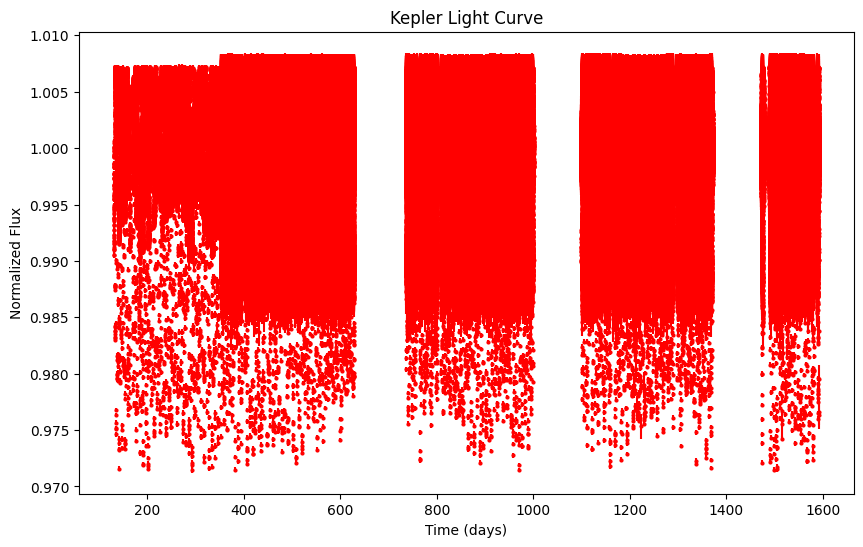

In [148]:
courseworkb.plot_light_curve(kepler_dataframe['time'], kepler_dataframe['flux'], kepler_dataframe['error'])

Running Lomb-Scargle Periodogram Analysis...


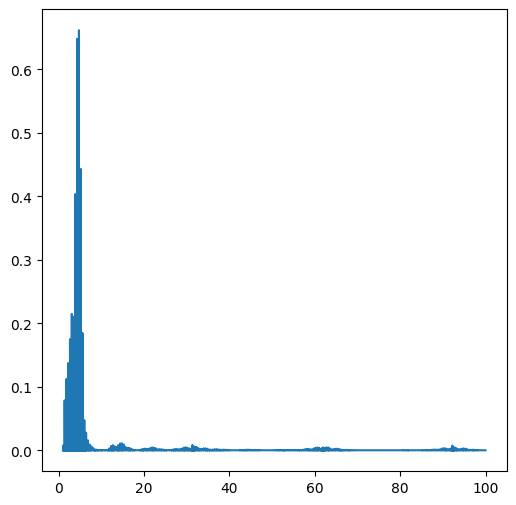

computing second periodogram


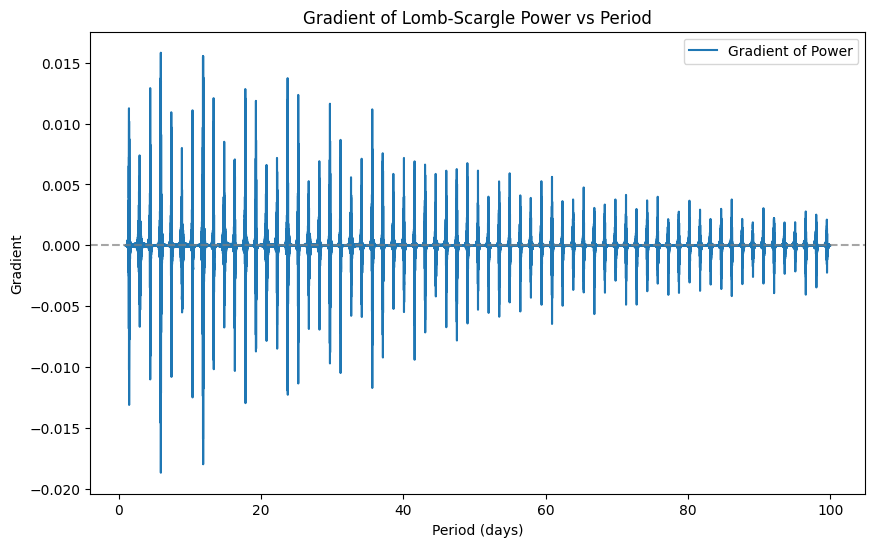

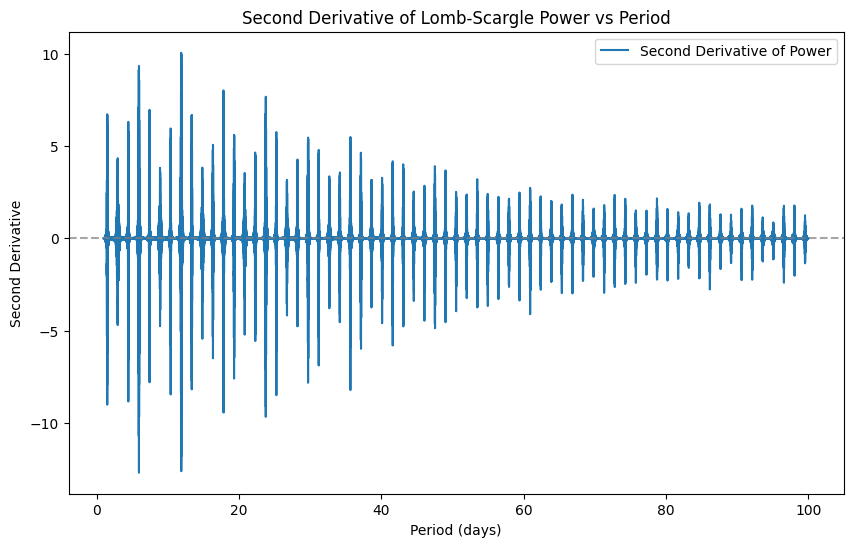

Excluding peaks before period = 1.00 days
Lomb-Scargle Periodogram analysis done


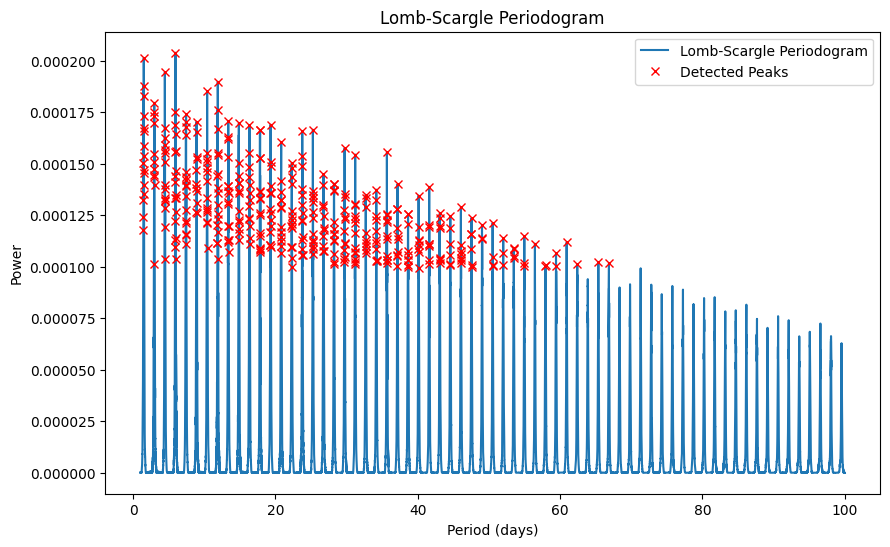

In [149]:

peaks_of_lightcurve = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=200000)

In [150]:
results_list_no_filter = courseworkb.analyze_peaks_with_bls(
      kepler_dataframe["time"].values,
      kepler_dataframe["flux"].values,
      kepler_dataframe["error"].values,
      peaks_of_lightcurve,
      200000
)





Analyzing period 1.43 days...
Analyzing period 1.52 days...
Analyzing period 3.00 days...
Analyzing period 4.50 days...
Analyzing period 5.95 days...
Analyzing period 7.41 days...
Analyzing period 8.90 days...
Analyzing period 10.39 days...
Best Period: 1.4857087333997643, Best Duration: 0.078, Best Transit Time: 132.79470357028603
Analyzing period 1.44 days...
Best Period: 1.4857124992539101, Best Duration: 0.078, Best Transit Time: 132.79270357028605
Analyzing period 1.53 days...
Best Period: 2.9714157305961235, Best Duration: 0.078, Best Transit Time: 132.79470357028603
Analyzing period 4.41 days...
Best Period: 4.457134747772981, Best Duration: 0.078, Best Transit Time: 134.27870357028604
Analyzing period 4.50 days...
Best Period: 5.942832807625908, Best Duration: 0.078, Best Transit Time: 132.79470357028603
Analyzing period 5.96 days...
Best Period: 7.428563824852766, Best Duration: 0.075, Best Transit Time: 132.79220357028603
Analyzing period 7.42 days...
Best Period: 8.914234704

KeyboardInterrupt: 

In [ ]:


print(f"Number of peaks found: {len(results_list_no_filter)}")

results_list = courseworkb.remove_duplicate_periods(results_list_no_filter,0.1,0.5, 0.75)

print(f"Number of peaks found after removing duplicates: {len(results_list)}")

print(f"headers: {results_list[0].keys()}")

Number of peaks found: 6
Adding period 4.438 days to the unique results.
Adding period 8.876 days to the unique results.
Adding period 13.314 days to the unique results.
Adding period 17.752 days to the unique results.
Adding period 22.190 days to the unique results.
Adding period 26.628 days to the unique results.
Adding period 4.438 days to the final results.
Adding period 22.190 days to the final results.
Number of peaks found after removing duplicates: 2
headers: dict_keys(['candidate_period', 'refined_period', 'transit_model', 'power', 'duration', 'depth'])


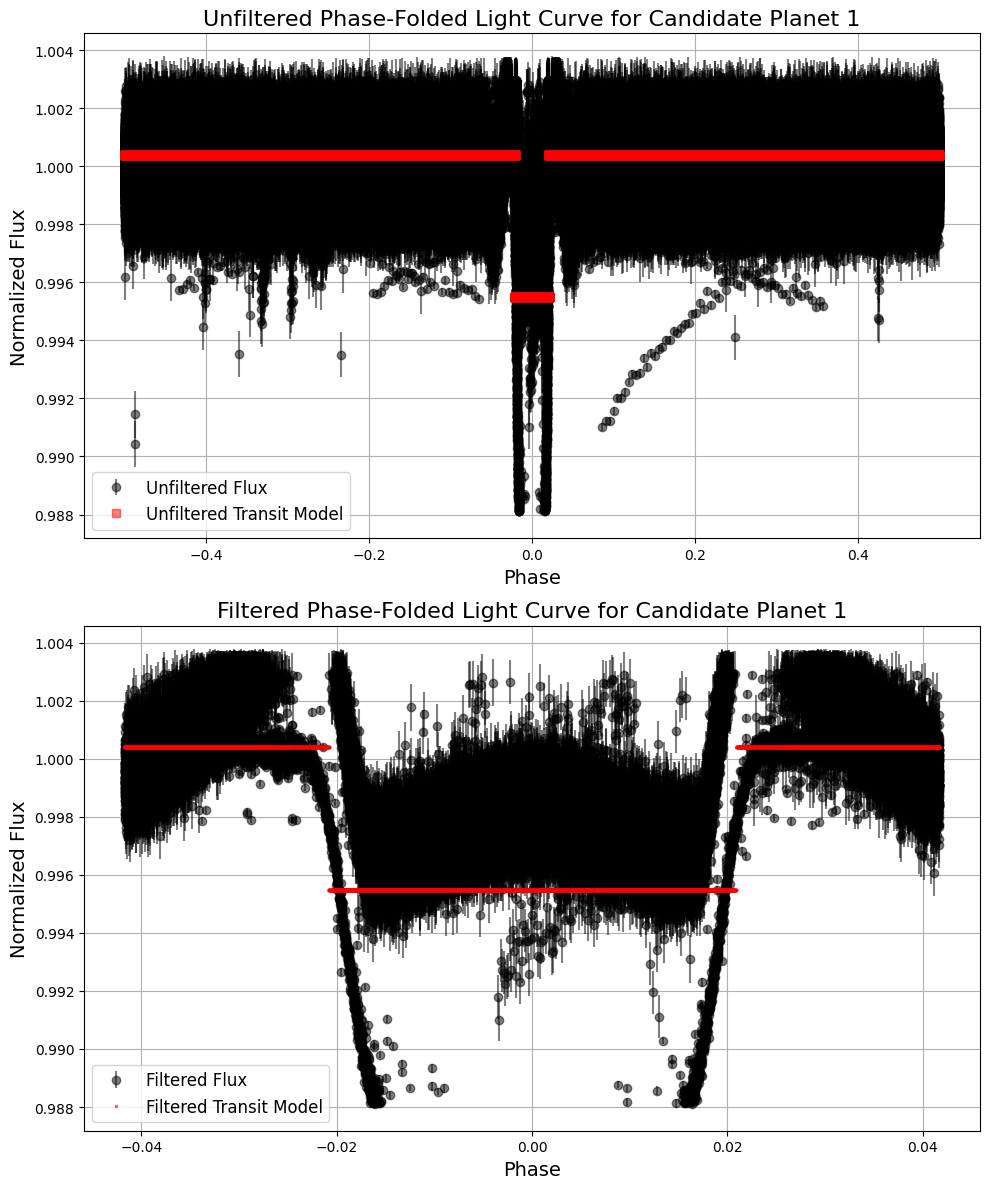

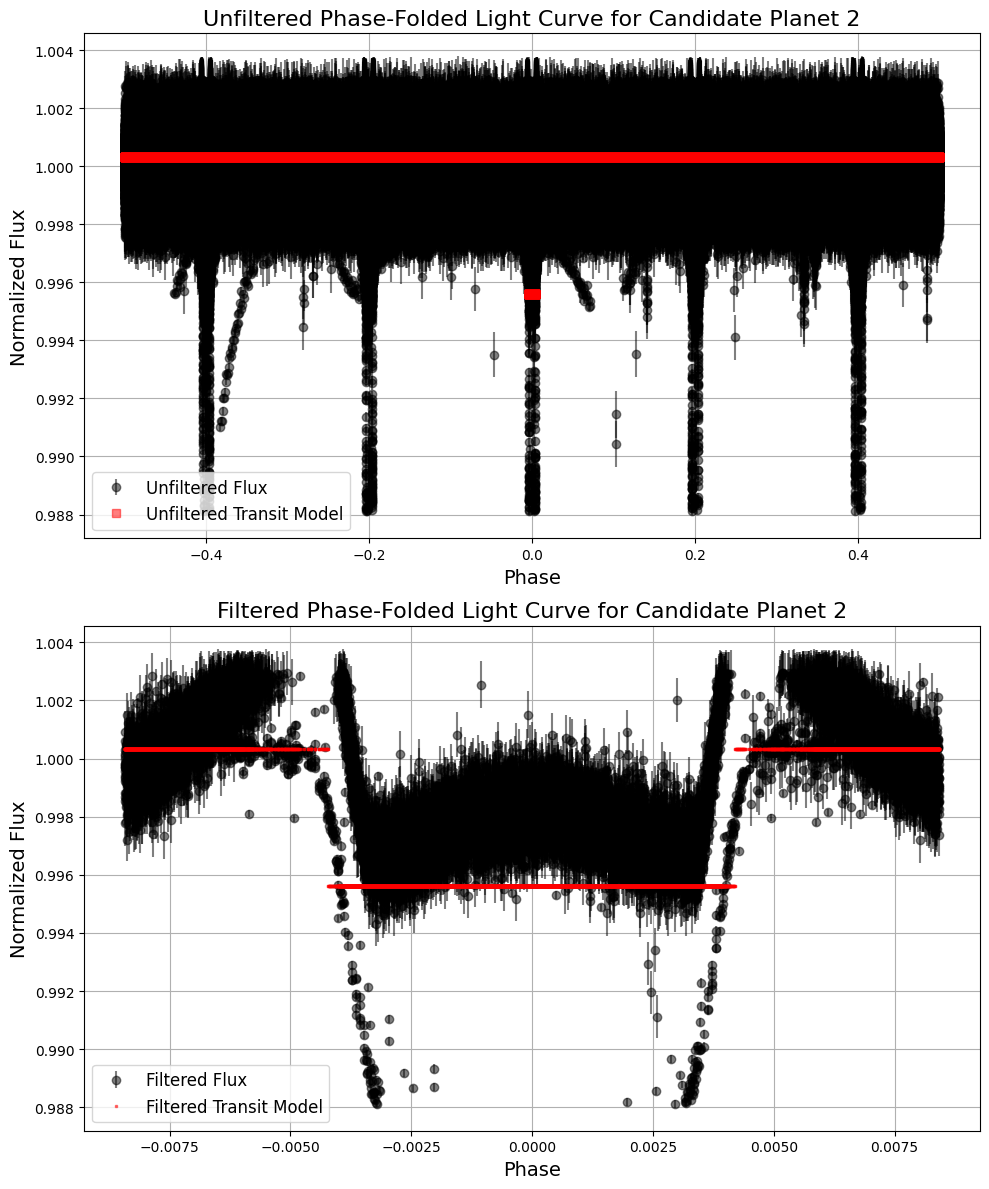

In [ ]:
# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)
courseworkb.plot_phase_folded_light_curves(kepler_dataframe,results_list )

In [ ]:
courseworkb.summarize_results(results_list,stellar_data)



Detected Planet Candidates:
----------------------------------------
Stellar Radius: 1.415 Solar Radii
Stellar Temperature: 5953 K
----------------------------------------

----------------------------------------
Candidate 1:
  Initial Period = 4.44 days
  Refined Period = 4.44 days
  Transit Depth  = 4.90e-03
  Transit Duration = 0.18 days
  Power = 1508483.26
----------------------------------------
Best Transit Candidate: Period = 4.44 days, Depth = 4.90e-03
Estimated Planet Radius: 0.099 Solar Radii
Estimated Planet Radius: 10.799 Earth Radii
Estimated Planet Radius: 0.986 Jupiter Radii

----------------------------------------
Candidate 2:
  Initial Period = 22.19 days
  Refined Period = 22.19 days
  Transit Depth  = 4.72e-03
  Transit Duration = 0.19 days
  Power = 298328.37
----------------------------------------
Best Transit Candidate: Period = 22.19 days, Depth = 4.72e-03
Estimated Planet Radius: 0.097 Solar Radii
Estimated Planet Radius: 10.601 Earth Radii
Estimated Planet